<a href="https://colab.research.google.com/github/jennkimerson/OCR_ArchivalDataOrganization_HGARC/blob/master/Mk4_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mk. 4
Reads in text by binding individual characters with boxes in attempts to preserve white spaces.

## I. Data Selection
Prompts the user to select pages they want to read in

In [0]:
#install PyPDF2
!pip install PyPDF2
import PyPDF2
from PyPDF2 import PdfFileReader, PdfFileWriter
import os.path

     |████████████████████████████████| 81kB 3.2MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=0730bd5fa5553f6f84c2e99ea81c11e0812c562faacffb3c2336906b1d7dcde7
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
# USER INPUT: PDF FILE
#takes in a file from the user and imports the image file
from google.colab import files

print("Please select a PDF file.")
uploaded = files.upload()

Please select a PDF file.


Saving GiovanniNikki.pdf to GiovanniNikki.pdf


In [0]:
# configures file path
file_path = ''

while True:
  input_path = input("Document name: ")
  if os.path.exists(input_path + '.pdf'):
    file_path = input_path + '.pdf'
    break
  print("File not found.")

Document name: DIO
File not found.
Document name: GiovanniNikki


In [0]:
# PAGE SELECTION

input_file = PdfFileReader(open(file_path,'rb'))
page_count = input_file.getNumPages()

print("This document contaions " + str(page_count) + " page(s). " "Please select pages to be read in.")
print("If you want a single page to be read in, type in the same page number for both start and last page.")

while True:
  input_start = input("Start page: ")
  if input_start.isdigit() and int(input_start) > 0 and int(input_start) < page_count:
    break
  else:
    print("You must select a page number greater than 1 and less than " +  str(page_count) + ".")      

while True:
  input_last = input("Last page: ")
  if input_last.isdigit() and int(input_last) <= page_count:
    if int(input_last) >= int(input_start):
      break
    else:
      print("Your last page number should be larger than start page number, which is " + str(input_start) + ".")
  else:
    print("You must select a page number less than " + str(page_count) + " page(s).")
    
print("All set!")

This document contaions 223 page(s). Please select pages to be read in.
If you want a single page to be read in, type in the same page number for both start and last page.
Start page: 46
Last page: 49
All set!


## II. File Conversion
Read in PDF to images (TIF)

In [0]:
!sudo apt-get update
!sudo apt install poppler-utils

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 https://cloud.r-project.org/bin/

In [0]:
#install pdf2image
!pip install pdf2image
from pdf2image import convert_from_path

  Created wheel for pdf2image: filename=pdf2image-1.7.1-cp36-none-any.whl size=7195 sha256=e870e887b61a75b0e05a747ab50c60ec2112746ef6cd34b3152e7c61b18290b7
  Stored in directory: /root/.cache/pip/wheels/9f/d5/c6/bf0b01b8b7f08d1c144ad90450aee30fe542c666aac221d6ce
Successfully built pdf2image


In [0]:
# PAGE CONVERSION
# converts each .pdf pages into a .tif format images

pdf_writer = PdfFileWriter()

for page_num in range(int(input_start) - 1, int(input_last)):
  pdf_writer.addPage(input_file.getPage(page_num))
  
selection = 'selection.pdf'
 
with open(selection, 'wb') as out:
  pdf_writer.write(out)

pages = convert_from_path(selection, 400) #convert_from_path(file_name, dpi) returns an array of images, one for each page

p_range = range(len(pages))

for i in p_range:
  pages[i].save('input' + str(i) + '.tif', 'TIFF')

## III. Enhance Image
Reduce the background noise in images for accurate scanning

In [0]:
# import necessary python libraries for image enhancement

import numpy as np
import cv2

from PIL import Image

In [0]:
# READ

for i in p_range:
  img = cv2.imread('input' + str(i) + '.tif', cv2.IMREAD_GRAYSCALE)
  
  """increase contrast"""
  """would like to scale on a non-linear level but have yet to understand how to do such"""
  pxmin = np.min(img)
  pxmax = np.max(img)
  imgContrast = np.round((img / 255)) * 255
  # (debug line) print(pxmin, pxmax)
  
  # (debug line) print(img.shape)
  
  """noise removal via closing technique"""
  kernel = np.ones((2, 2), np.uint8)
  imgCleaned = cv2.erode(imgContrast, kernel, iterations = 2)
  imgCleaned = cv2.dilate(imgCleaned, kernel, iterations = 3)
  # cv2.morphologyEx(imgContrast, cv2.MORPH_CLOSE, kernel)
  
  """write"""
  cv2.imwrite('cleaned' + str(i) + '.tif', imgCleaned)

  """save"""
  img = Image.open('cleaned' + str(i) + '.tif')
  rgb_img = img.convert('RGB')
  rgb_img.save('cleaned' + str(i) + '.tif')
  
  # """increase line width"""
  # kern = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
  # imgWord = cv2.erode(imgCleaned, kern, iterations = 1) #- cv2.dilate(imgContrast, kern, iterations = 1)
  
  # """write"""
  # cv2.imwrite('words' + str(i) + '.tif', imgWord)

  # """save"""
  # img = Image.open('words' + str(i) + '.tif')
  # rgb_img = img.convert('RGB')
  # rgb_img.save('words' + str(i) + '.tif')
  
  # cv2.imwrite('cont' + str(i) + '.tif', imgContrast)
  
  # img = Image.open('cont' + str(i) + '.tif')
  # rgb_img = img.convert('RGB')
  # rgb_img.save('cont' + str(i) + '.tif')

##IV. Binding boxes with Enclosed Characters
Finds all text characters in the image and returns binidng boxes with enclosed characters

In [0]:
#install pytesseract for OCR

!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=8432670c5af07cd39fd37fcbaedd3e0f9ddc5ffd492a6bfd0129b2477efbc835
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 76 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [0]:
# import necessary python libraries for OCR

import pytesseract
from pytesseract import Output

try:
    from PIL import Image
except ImportError:
    import Image
    
import cv2

import numpy as np

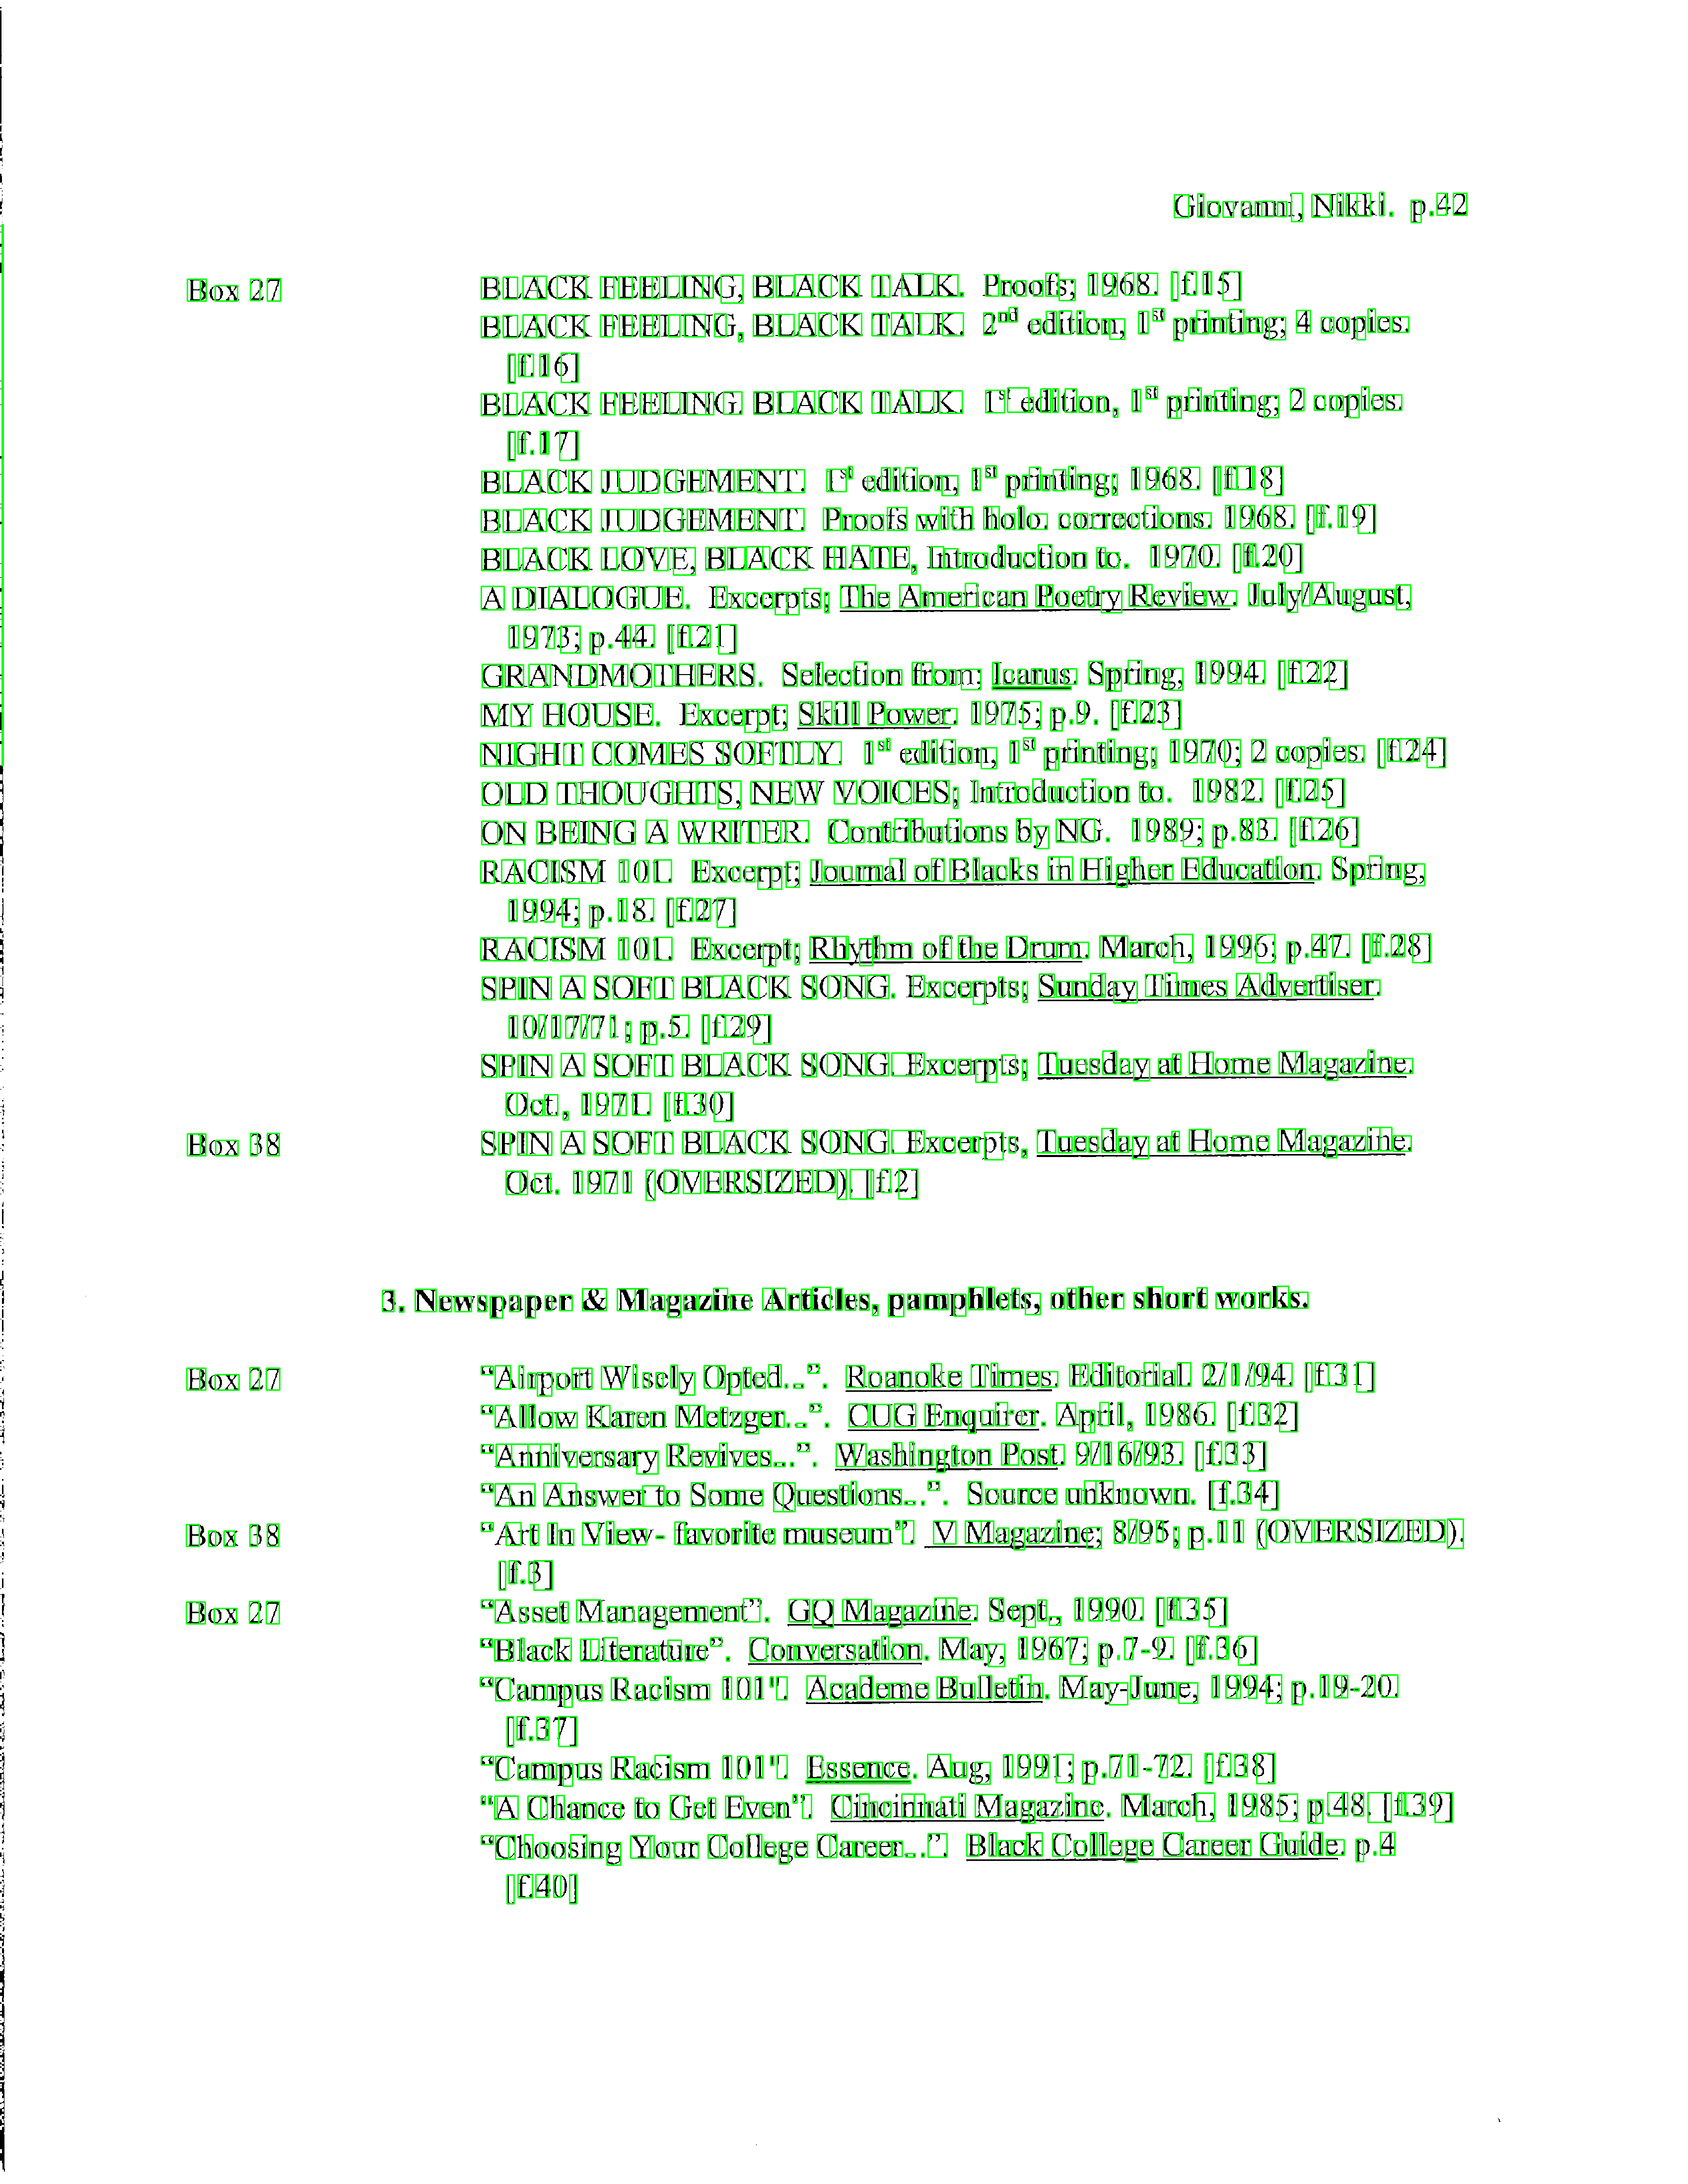

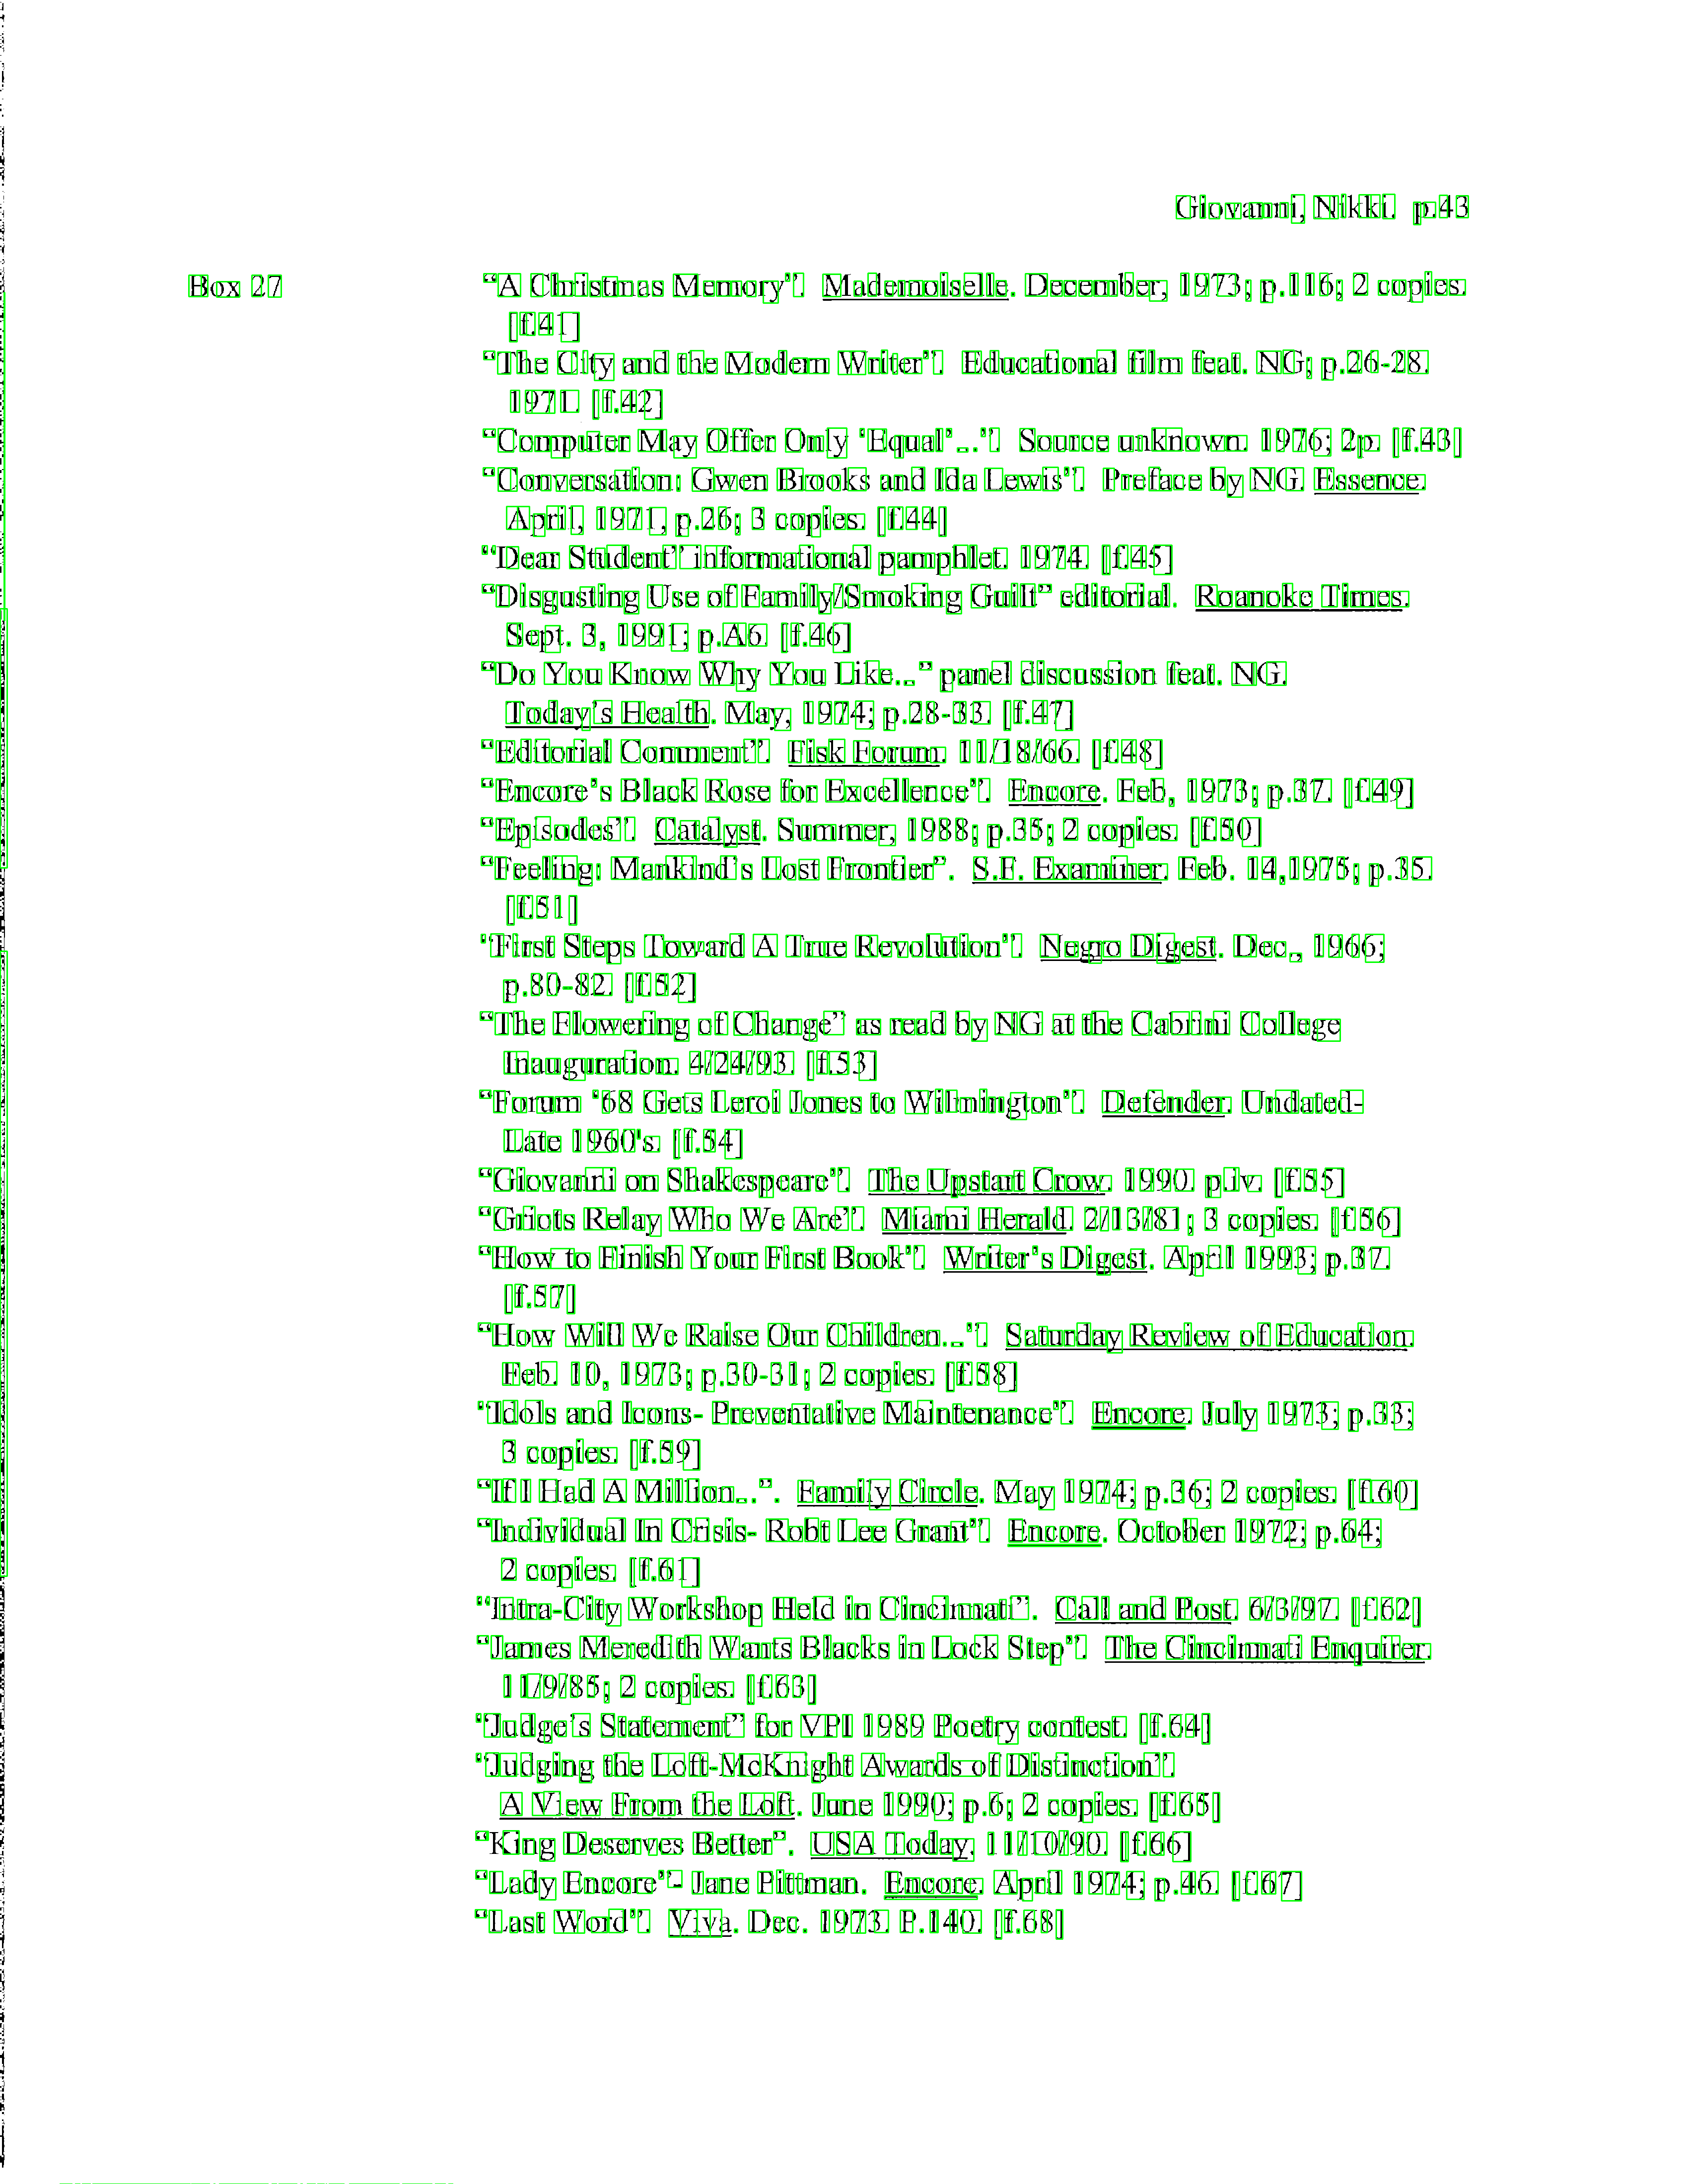

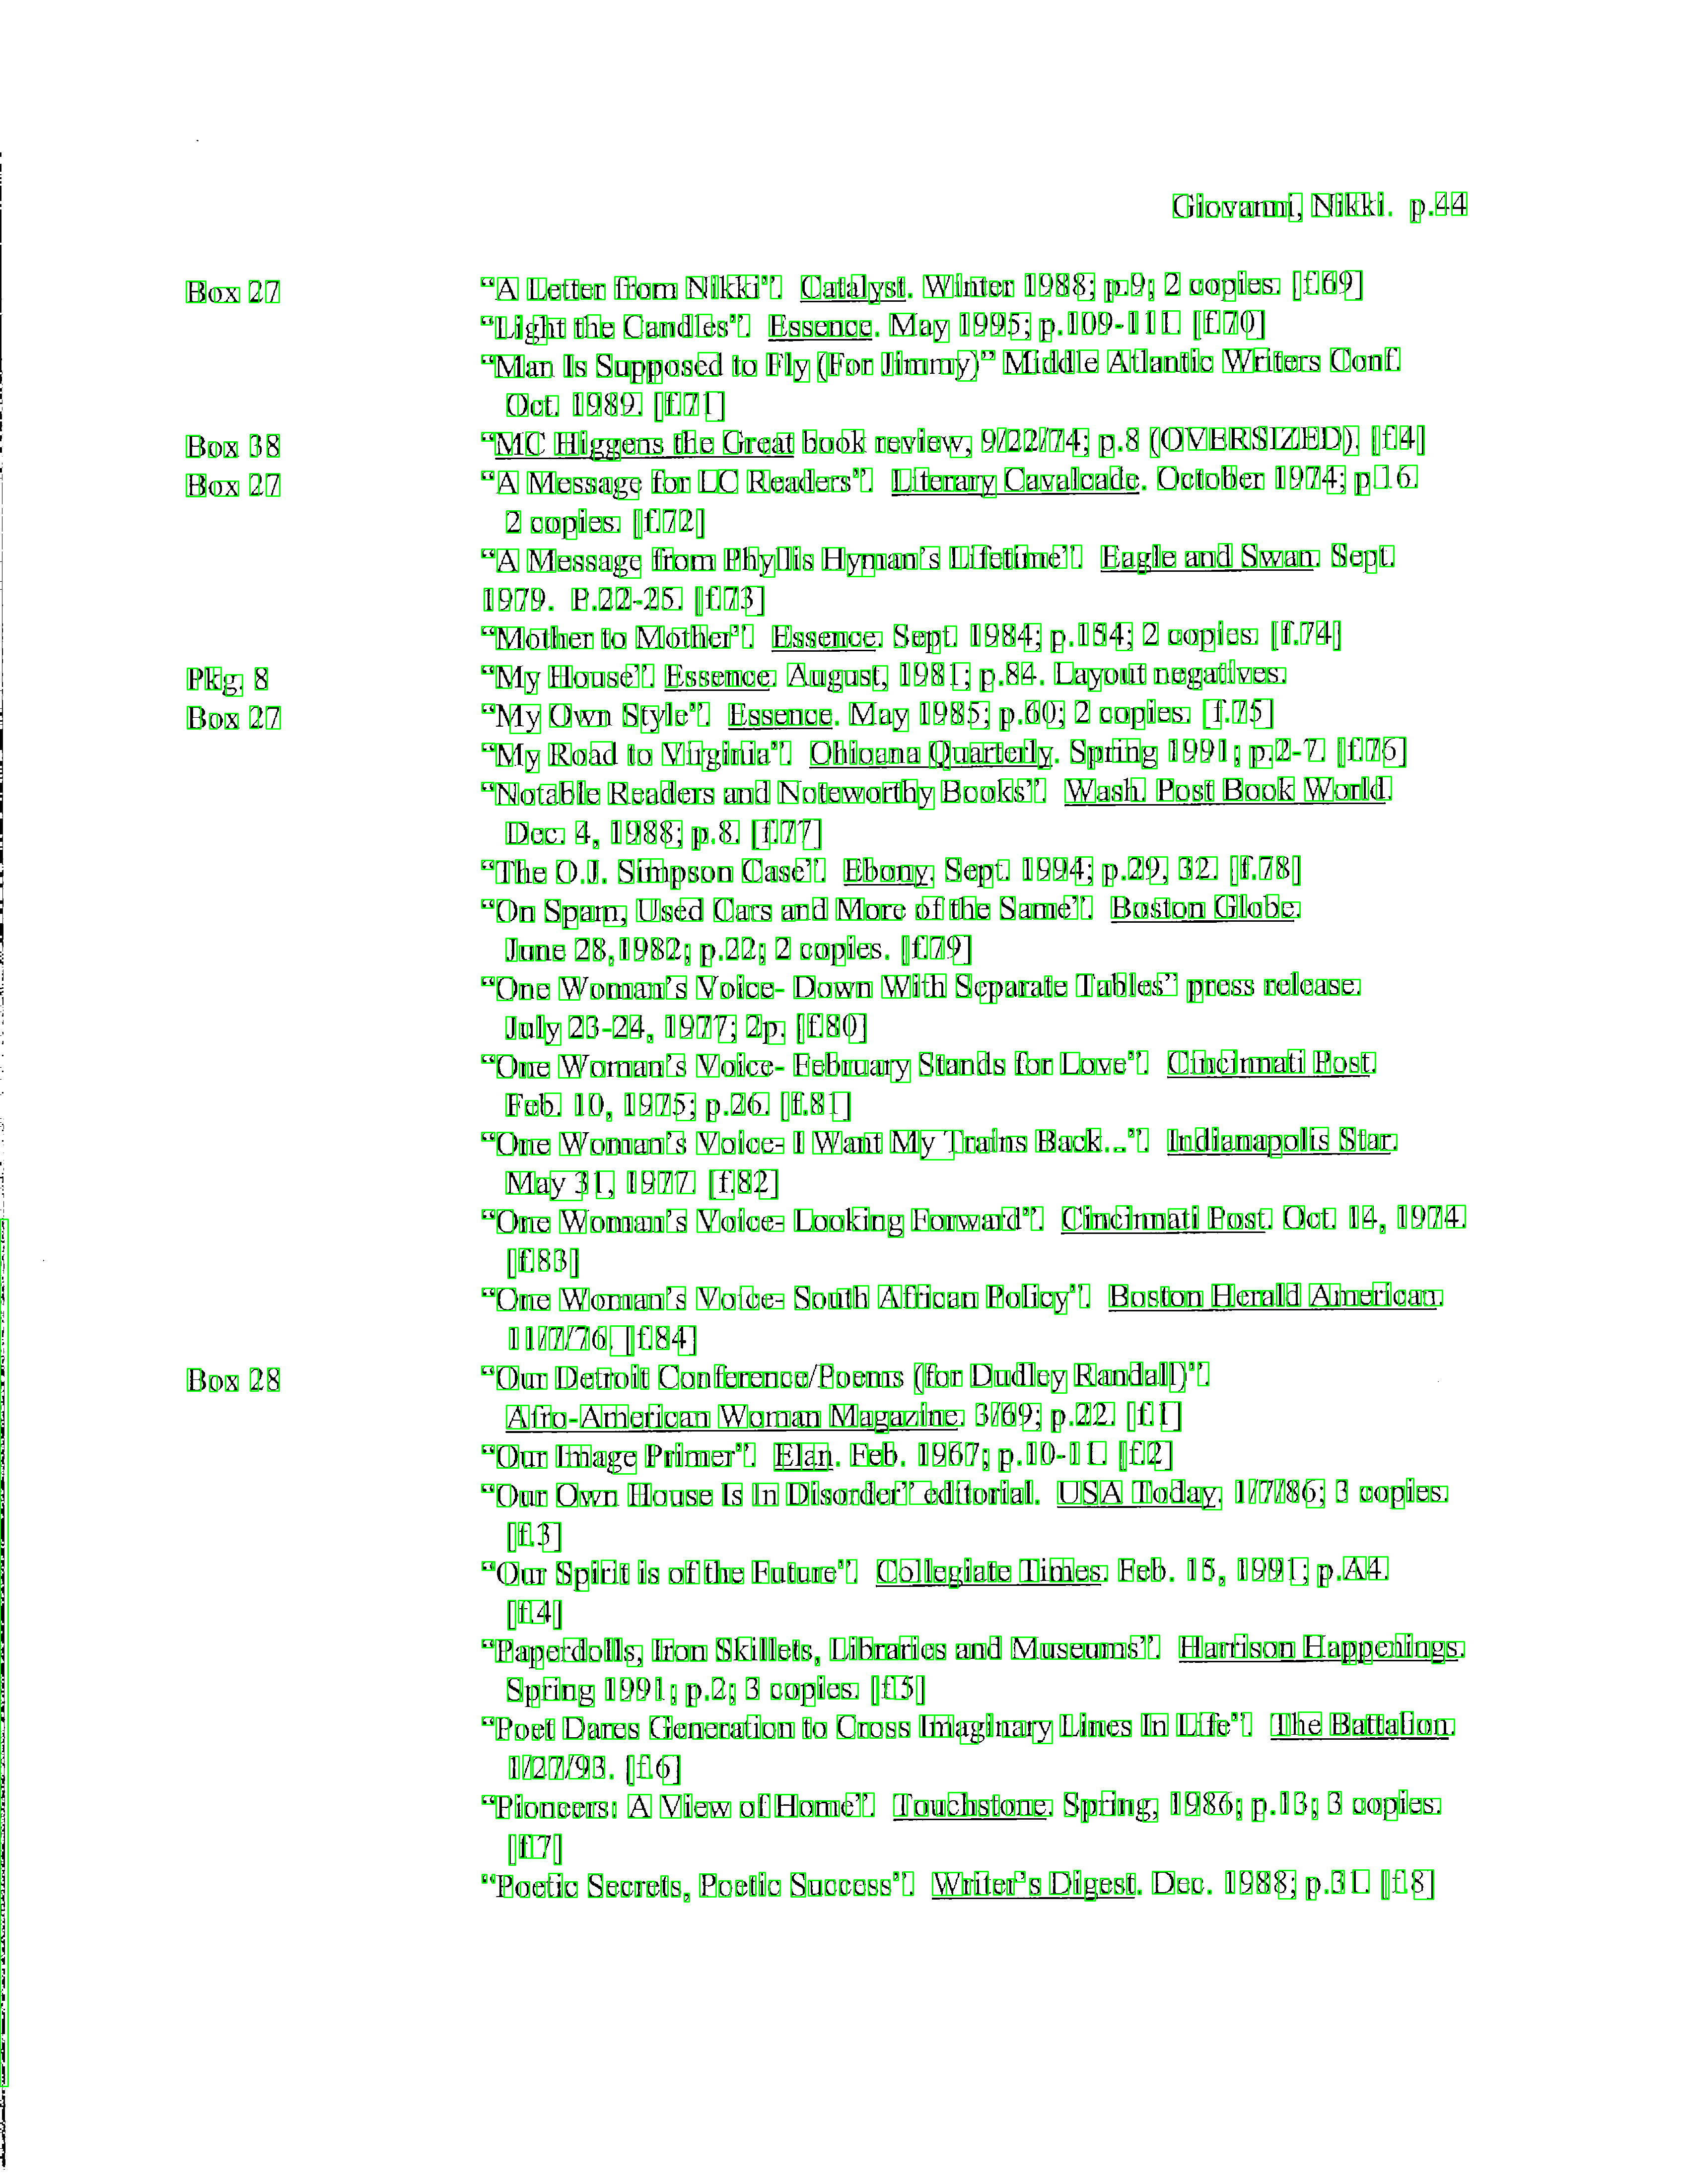

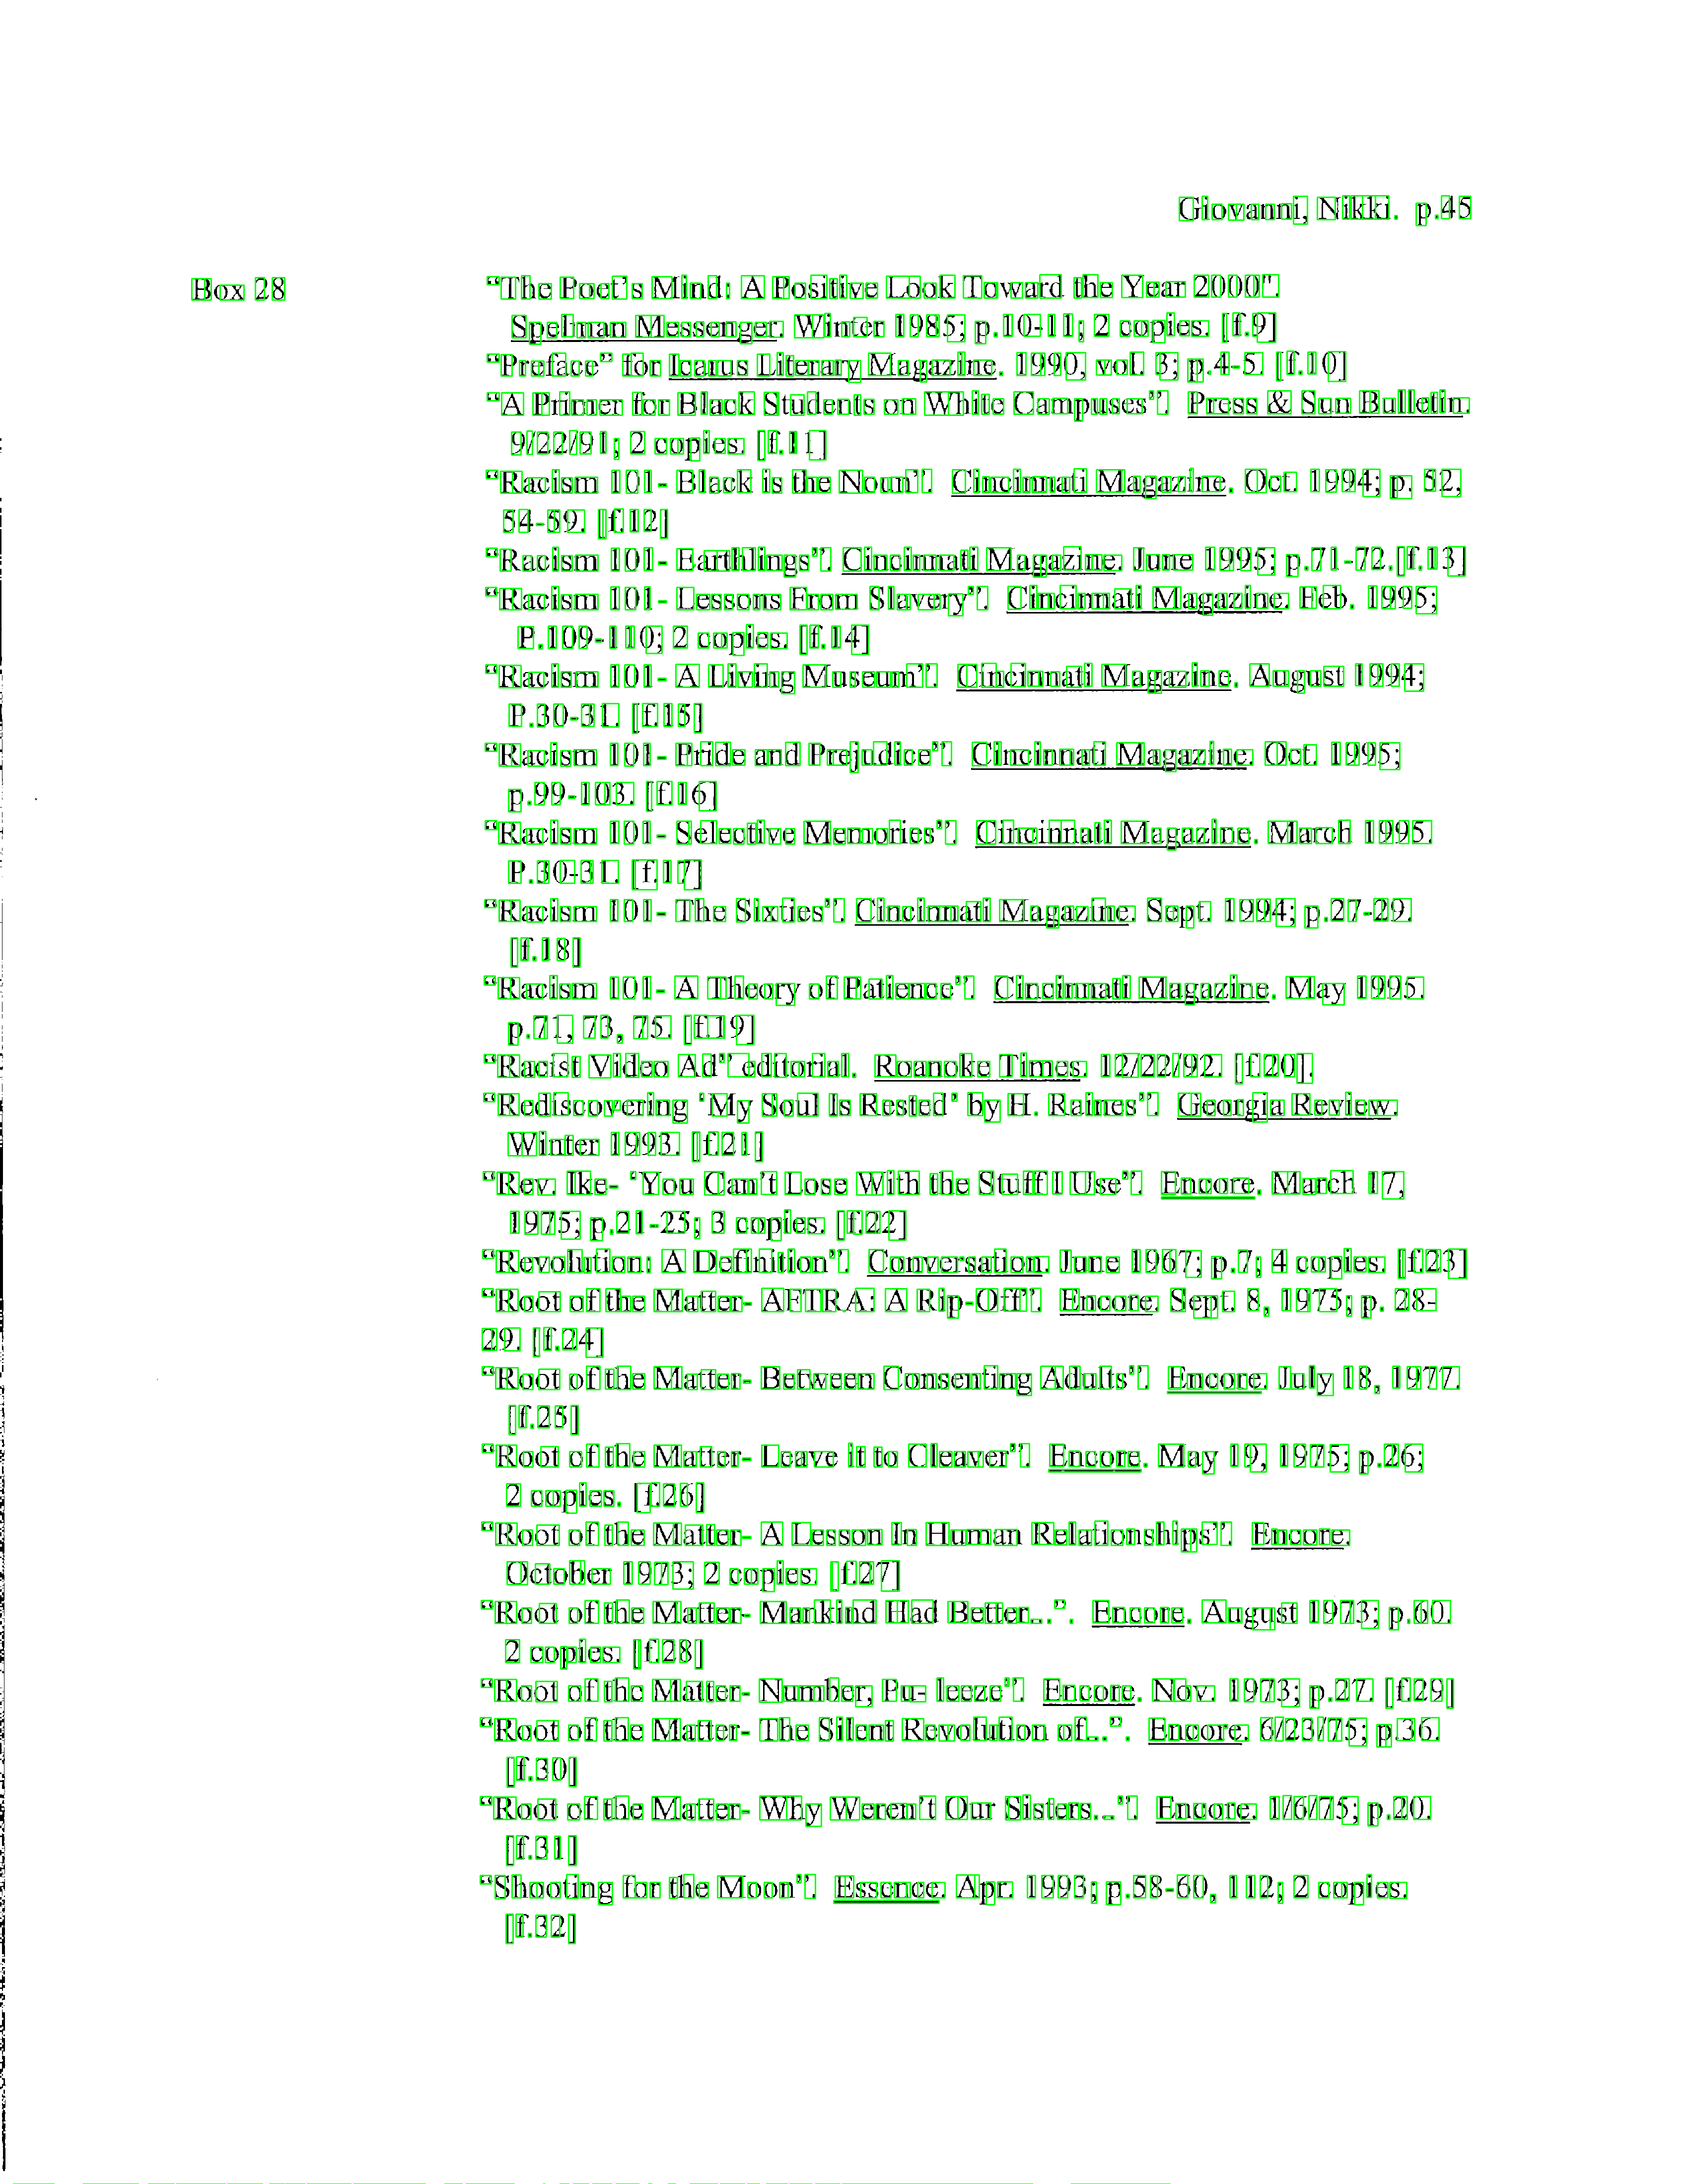

In [0]:
# DRAW ENCLOSED BOXES AROUND EACH TEXT FOUND DURING OCR

for i in p_range:
  img = Image.open('cleaned' + str(i) + '.tif')
  # cover = Image.open('words' + str(i) + '.tif')
  # debg = Image.open('cont' + str(i) + '.tif')
  
  """draw boxes around each of the found characters"""
  
  nparray = np.array(img)
  # oparray = np.array(cover)
  
  frame = nparray

  H, W, _ = nparray.shape

  """char with bounding boxes"""
  boxes = pytesseract.image_to_boxes(img)
  # cover_boxes = pytesseract.image_to_boxes(cover)

  """draw the bounding boxes on the image"""
  for b in boxes.splitlines():
      b = b.split(' ')
      draw = cv2.rectangle(frame, (int(b[1]), H - int(b[2])), (int(b[3]), H - int(b[4])), (0, 255, 0), 2) #currently outputs wrong color scheme
      
  # for cb in cover_boxes.splitlines():
  #    cb = cb.split(' ')
  #    # print(cb[1])
  #    # print(int(cb[1]))
  #    draw = cv2.rectangle(frame, (int(cb[1]), H - int(cb[2])), (int(cb[3]), H - int(cb[4])), (100, 100, 255), 2)

  """fix color error"""
  RGB_img = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
  
  """show result"""
  from google.colab.patches import cv2_imshow
  #%matplotlib
  cv2_imshow(RGB_img)

##V. Coordinates to Lines
Get coordinates of all boxes in order to find the minimum x coordniate value. This is where we will start counting white spaces.

In [0]:
#find size of the segmented image in width and hieght

width, height = img.size
# (debug line) print (width, height)

In [0]:
"""Assign meaningful names to box indices"""
x = 1
y = 2
w = 3
h = 4

In [0]:
"""Creation of sub-processes"""

def trimX(boxList):
  """
  Set the leftmost occupied x-coordinate to 0
  """
  
  # EXTRACT ALL X-COORDINATES FROM BOXES
  xcoords = [int(box[x]) for box in boxList]
  # (debug line) print(xcoords)

  # FIND MINIMUM X-COORDINATE
  x_min = min(xcoords)
  # (debug line) print ("min x coordinate vlaue : ", x_min)

  # SHIFT ALL VALUES DOWN APPROPRIATELY - MUTATES INPUT
  for box in boxList:
    box[x] = int(box[x]) - x_min
    box[y] = int(box[y])
    box[w] = int(box[w]) - x_min
    box[h] = int(box[h])

  """
  # FIND THE SPAN OF THE DOCUMENT (This section isn't necessary)
  x_max = max(xcoords)
  # (debug line) print ("max x coordinate vlaue : ", x_max)

  span = x_max - x_min  
  # (debug line) print ("Span of text in the document: ", span)
  """
  
  return boxList

def getStats(boxList):
  """
  Determine average font size and standard deviation
  """
  
  # GATHERS ALL X AND Y LENGTHS
  f_x = []
  f_y = []
  for box in boxList:
    f_x.append(box[w] - box[x])
    f_y.append(box[h] - box[y])    
  # (debug line) print(f_x)
  # (debug line) print(f_y) 
  
  # CALCULATES STATISTICAL VALUES WITH NUMPY
  f__x = np.mean(f_x)
  f__y = np.mean(f_y)
  sigma_x = np.std(f_x)
  sigma_y = np.std(f_y)
  # (debug line) print("average font size, x direction: ", f__x)
  # (debug line) 
  print("average font size, y direction: ", f__y)
  # (debug line) print("standard deviation, x direction: ", sigma_x)
  # (debug line) 
  print("standard deviation, y direction: ", sigma_y)
  
  return [f__x, f__y, sigma_x, sigma_y]

def removeNoise(boxList):
  """
  Eliminates non-text noise by scanning for extremely large / small boxes
  Need to have getStats beforehand
  """
  
  # SETS LOWER AND UPPER BOUNDS FOR BOX DIMENSIONS
  x_l = int(f__x / 3)
  x_u = int(f__x * 3)
  
  # CREATES A NEW LIST THAT EXCLUDES ALL NOISE
  boxFilt = []
  for box in boxList:
    if box[w] - box[x] > x_l and box[w] - box[x] < x_u:
      boxFilt.append(box)
  
  return boxFilt  


def isUpperChar(char):
  """ 
  listed characters hinder deciding upper bounds for boxes
  """
  return char in ["\"", "\'", "‘", "’", "“", "”", "%"]
  
  
def isLowerChar(char):
  """ 
  listed characters hinder deciding lower bounds for boxes
  """
  return char in ["g", "j", "p", "y", ")", "(", "&"]
  
  
def toLines(boxList):
  """
  Identify and separate boxes with respect to y-clusters
  Need to have getStats beforehand, as well as set a dev_y
  """
  
  # IDENTIFY AND FORM Y-CLUSTERS
  lines_y = []
  boxLines = []  
  for box in boxList:
    if box[h] - box[y] > 0:
      y_val = box[y]
      
      # Special measures are taken for characters that don't follow the base line
      if isUpperChar(box[0]):
        y_val -= int(round(f__y))
      if isLowerChar(box[0]):
        y_val += int(round(f__y / 2))

      wingspan = range(y_val - dev_y, y_val + dev_y + 1)
      upperspan = range(y_val - dev_y + int(round(f__y)), y_val + dev_y + 1 + int(round(f__y)))
      lowerspan = range(y_val - dev_y - int(round(f__y) / 2), y_val + dev_y + 1 - int(round(f__y) / 2))

      if set(wingspan).isdisjoint(set(lines_y)):
        # (debug line) print(wingspan)
        if isUpperChar(box[0]) and not set(upperspan).isdisjoint(set(lines_y)):
          # This takes care of the OCR drawing boxes around the quotation marks oddly
          wingspan = upperspan
        elif isLowerChar(box[0]) and not set(lowerspan).isdisjoint(set(lines_y)):
          # This takes care of the OCR drawing boxes around underline characters oddly
          wingspan = lowerspan
        else:
          boxLines.append([])
          lines_y.append(y_val)

      lineDex = lines_y.index(list(set(lines_y) & set(wingspan))[0])
      boxLines[lineDex].append(box)
  # (debug line) print(lines_y)
  # (debug line) print("number of lines: ", len(lines_y))
  # (debug line) print(boxLines)
  # (debug line) [print(line) for line in boxLines]
  
  
  def ykey(line):
    """
    Sort y clusters
    """
    return line[0][y]
  boxLines.sort(key = ykey, reverse = True)
  
  # SORT LINES (in case scan order is wrong)
  def xkey(box):
    return box[x]
  for lines in boxLines:
    lines.sort(key = xkey)
  
  # (debug line) [print(line) for line in boxLines]
  
  return boxLines

"""STILL NEED TO IMPLEMENT AND REFINE"""
def toText(boxlines):
  return ""

In [0]:
#find all characters and their coordinates in the image
from pytesseract import pytesseract as pt

document = ""
parseMat = []

for i in p_range:
  # (debug line) print(i)
  img = Image.open('cleaned' + str(i) + '.tif')
  coord = pt.image_to_boxes(img)
  # (debug line) print(coord)
  
  
  """Break string"""
  coordListPrep = sentences = coord.splitlines()
  #coordList = coord[0:len(coord)-1].split("\n")
  # (debug line) print(coordListPrep)

  coordList = []
  for i in range(0, len(coordListPrep)):
    new = coordListPrep[i].split(" ")
    coordList.append(new)
    
  # (debug line) print(coordList)
  
  """Zero the leftmost x-coordinate"""
  trimList = trimX(coordList)

  # (debug line) print(trimList)  
  
  """Obtain stats of the page"""
  [f__x, f__y, sigma_x, sigma_y] = getStats([box for box in trimList if box[0].isalnum()])
  
  """Filter out the noise"""
  filtList = removeNoise(trimList)
  
  """Derive extra parameters from stats"""
  # DEVIATIONS
  # dev_x = round(k * sigma_x)
  dev_y = int(4.5 * round(sigma_y))
  
  # TOLERANCE
  k = 1.2 #this should be adjusted
  tau = f__x + sigma_x * k
  
  """Cluster boxes by y-coordinate"""
  boxLines = toLines(filtList)
  
  """Assemble raw strings and also edit rawline to add intraword and interwrod spaces"""
  rawlines = []
  for line in boxLines:
    rawline = "" + int((line[0][x]) / tau) * " "

    for i in range(len(line)):
      box = line[i]
      rawline += box[0]

      if (i+1) == len(line):
        break

      nextbox = line[i + 1]

      #adjust sigma_x coefficient as needed
      gap = nextbox[x] - box[w]

      if gap >= tau:
        space = int(gap / tau)
        rawline += space * " "
    
    print(rawline)
    
    rawlines.append(rawline + "\n")
    parseMat.append(rawline + "\n")

  # print(rawlines)
  
  text = " ".join(rawlines)

  #print(text)
  
  document += text + "\n"

# document

average font size, y direction:  40.449963476990504
standard deviation, y direction:  7.829110821715956
                                                                    Giovanni,Nikki p42
          Box27           BLACKFEELING,BLACKTALK. roofs;1968.f.1]
                            BLACKFEELING,BLACKTALK. 2™edition,1“printing;4copies.
                             [f.1]
                            BLAC   FEELING.BLACKTALK. 1edition,1*printin;2copies.
                             [f1]               e       *
                            BLACKJUDGEMENT. * dition,1 printing;198.[£.1]
                            BLAC   JUDGEMENT. Proofswithholo.corrections.198.[f 19]
                            BLACKLOVE,BLACKHATE,Introuctionto 1970.[f 0]
                            ADIALOGUE. xcerpts;TheAmericanPoetryRevie.July/August,
                             193;p 4.[£2]
                            GRAN DMOTHERS. electionfrom;Icarus.Spring,1994.[£2]
                            MYHOUSE. xcerpt;SillPo

average font size, y direction:  38.2336747759283
standard deviation, y direction:  10.394020636170508
                                                                       Giovanni,Nikki. p.43
           Box27            “AChristmasMemory’. Mademoiselle December,193;p 116;2copies.
                              (f.41]
                             “TheCityandtheModernWriter”. Educationalfilmfeat NG;p26-28.
                               1971.[f42]
                             ““ComputerMayOfferOnly‘Eual’..”. Sourceunknon.1976;2p.[f43]
                              Conversation GwenBrooksandIdaLewis”. PrefacebyNG.Essence.
                              April,1971,p26;3copies.[f.44]
                             ““earSudent”informationalpamphlet.1974.[f.45]
                              DisgustingUseofFamily/SmokingGuilt”editorial RoanokeTimes.
                              Sept 3,1991;pA6.[f46]
                             “DoYouKnowWhyYouLie..”paneldiscussionfeat N.
                     

average font size, y direction:  39.576071922544955
standard deviation, y direction:  7.974767091146675
                                                                         Giovanni,Nikki p 44
           Box27            “ALetterfromN ki”. Catalyst Winter1988;p.9;2cpies.f.6]
                              “LihttheCandles’. Essence May1995;p 109-11.[£7]
                              “ManIsSupposedtoFly(ForJimmy)”MiddleAtlanticWritersConf.
                               Oct.199.[f.71]
           Box38            “MC HiggenstheGratbookrevie,9/22/74;p8(OVERSIZED). f.4]
           Box27            “AMessageforLCReaders”. LiteraryCavalcade October1974;p.1.
                               2copies.[.72]
                              “AMessagefromPhyllisHyman’sLifetime”. EagleandSwan.Sept.
                              1979  P22-25. .73]
                              “MothertoMother’. Essence.Sept.1984;p 15;2cpis. f74]
           Pkg.8             “MyHouse”.Essence.August,1981;p84 Layoutnegat

average font size, y direction:  38.111493461803164
standard deviation, y direction:  10.37639659864938
                                                                Giovanni,Nikki p45
         Box28           “ThePoet’sMind APositiveLookToardtheYear2000".
                           SpelmanMessenger.Winter198;p1-11;2copies.[f9]
                          “‘Preface”forIcarusLiteraryMaazie 1990,vol.3;p.-S.[f1]
                           APrimerforBlackSudentsonWhiteCampuses”. Press&SunBulletin.
                           9/22/91;2copies.[f1]
                          “Racism101-BlackistheNoun”. CincinnatiMgazie Oct.1994;p.5,
                           54-59,[.12]
                          ““Racism101-Erthlings”.CincinnatiMagazine.June1995;p71-72{f1]
                          Racism101-LessonsFromSlavery”. CincinnatiMagazine.Feb 1995;
                           P109-110;2coptes.[f1]
                          “Racism101-ALivingMuseum”. CincinnatiMagazine Auust1994;
                       

In [0]:
# import necessary python library

import re as regex

In [0]:
def removeListings(line):
  """
  Remove listings to extract structure
  """
  
  charArray = list(line)
  leftBound = -1
  rightBound = -1
  alphnumCount = 0
  
  for i in range(len(charArray) - 2):
    if charArray[i].isalnum():
      alphnumCount += 1
      if alphnumCount > 9: 
        # probably not going to have a listing after that many characters
        break
    if charArray[i + 1] == ' ' and str(charArray[i + 2]).isspace() \
    and (charArray[i] == '.' or charArray[i] == ')' or charArray[i] == ','):
      sentinel = False
      bottomOut = False
      for j in range(i - 1, i - 5, -1):
        if j == -1:
          bottomOut = True
          break
        if charArray[j].isalnum():
          sentinel = True
        if not charArray[j].isalnum():
          if sentinel and charArray[j] == ' ':
            if j == 0 or (j != 0 and charArray[j - 1] == ' '): 
              if isListing(str(line[j + 1:i])):
                leftBound = j
          break
      if bottomOut and sentinel:
        leftBound = 0
      if leftBound != -1:
        rightBound = i
        break        
        
  if leftBound != -1 and rightBound != -1:
    return str(line[:leftBound]) + " " * (rightBound - leftBound + 1) + str(line[rightBound + 1:]) 
  else:
    return line
  
def isListing(small):
  if regex.search(r'\b([iIl])?([xXvViIl])+\b', small) \
  or regex.search(r'\b' + regex.escape(small[0]) + r'+\b', small) \
  or regex.search(r'\b([\dl])+\b', small):
    return True
  else:
    return False

In [0]:
"""Note: need to make removeListings optional and possibly streamline this process"""
final = ""

for lines in parseMat:
  # print(removeListings(lines))
  final += (removeListings(lines))

print(final)

                                                                    Giovanni,Nikki p42
          Box27           BLACKFEELING,BLACKTALK. roofs;1968.f.1]
                            BLACKFEELING,BLACKTALK. 2™edition,1“printing;4copies.
                             [f.1]
                            BLAC   FEELING.BLACKTALK. 1edition,1*printin;2copies.
                             [f1]               e       *
                            BLACKJUDGEMENT. * dition,1 printing;198.[£.1]
                            BLAC   JUDGEMENT. Proofswithholo.corrections.198.[f 19]
                            BLACKLOVE,BLACKHATE,Introuctionto 1970.[f 0]
                            ADIALOGUE. xcerpts;TheAmericanPoetryRevie.July/August,
                             193;p 4.[£2]
                            GRAN DMOTHERS. electionfrom;Icarus.Spring,1994.[£2]
                            MYHOUSE. xcerpt;SillPower.1975;p9 [£23]
                            NIGHTCOMES  OFTLY. 1" dition,1°pinting;1970;2cpies.[£24]
 

## VI. Structure Selection & Data Categorization
Prompts the user for structure (formatting and organization of data)

In [0]:
n = 0
c = 1

In [0]:
"""seperate text into an array of strings by line"""
sentences = final.splitlines()
print(sentences)

['                                                                    Giovanni,Nikki p42', '          Box27           BLACKFEELING,BLACKTALK. roofs;1968.f.1]', '                            BLACKFEELING,BLACKTALK. 2™edition,1“printing;4copies.', '                             [f.1]', '                            BLAC   FEELING.BLACKTALK. 1edition,1*printin;2copies.', '                             [f1]               e       *', '                            BLACKJUDGEMENT. * dition,1 printing;198.[£.1]', '                            BLAC   JUDGEMENT. Proofswithholo.corrections.198.[f 19]', '                            BLACKLOVE,BLACKHATE,Introuctionto 1970.[f 0]', '                            ADIALOGUE. xcerpts;TheAmericanPoetryRevie.July/August,', '                             193;p 4.[£2]', '                            GRAN DMOTHERS. electionfrom;Icarus.Spring,1994.[£2]', '                            MYHOUSE. xcerpt;SillPower.1975;p9 [£23]', '                            NIGHTCOMES  OFTLY

In [0]:
def partitionLines(charLines):
  """
  Partitions lines given a large block of white space in between
  """
  
  partedLines = []
  
  for line in charLines:
    charFront = False
    bigGap = False
    comboMeter = 0
    for charInd in range(len(line)):
      char = line[charInd]
      if char != " ":
        charFront = True
        comboMeter = 0
      if char == " " and charFront == True:
        comboMeter += 1
      if comboMeter > 4: # THIS CONDITION WILL VARY PER AID
        bigGap = True
        partedLines.append(line[:charInd])
        partedLines.append(" " * charInd + line[charInd:])
        break
    if not bigGap:
      partedLines.append(line)
  
  return partedLines

# CREATE SPACE COUNTING FUNCTION
def getStartSpaces(line):
    startSpaces = 0
    for char in line:
      if char == " ":
        startSpaces += 1
      else:
        return startSpaces
    return 1000 # case in which there's nothing in the line

def toCategories(charLines):
  """
  Sorts lines based on their respective categories, 
  determined from starting whitespace
  """  
  
  # IDENTIFY AND FORM HORIZONTAL CLUSTERS
  space_groups = []
  boxCateg = []
  for line in charLines:
    s_val = getStartSpaces(line)

    wingspan = range(s_val - 2, s_val + 2)

    if set(wingspan).isdisjoint(set(space_groups)):
      # (debug line) print(wingspan)
      boxCateg.append([s_val, []])
      space_groups.append(s_val)

    lineDex = space_groups.index(list(set(space_groups) & set(wingspan))[0])
    boxCateg[lineDex][c].append(line)
      
  # (debug line) print(space_groups)
  # (debug line) print("number of categories: ", len(space_groups))
  # (debug line) print(boxCateg)
  # (debug line) print([category for category in boxCateg])
  
  return boxCateg

sepLines = partitionLines(sentences)

catgList = toCategories(sepLines)

catgList

[[68,
  ['                                                                    Giovanni,Nikki p42']],
 [10,
  ['          Box27    ',
   '          Box38    ',
   '          Box27    ',
   '          Box38    ',
   '          Box27    ',
   '           Box27    ',
   '           Box27    ',
   '           Box38    ',
   '           Box27    ',
   '           Pkg.8    ',
   '           Box27    ',
   '           Box28    ',
   '         Box28    ']],
 [26,
  ['                          BLACKFEELING,BLACKTALK. roofs;1968.f.1]',
   '                            BLACKFEELING,BLACKTALK. 2™edition,1“printing;4copies.',
   '                            BLAC   FEELING.BLACKTALK. 1edition,1*printin;2copies.',
   '                            BLACKJUDGEMENT. * dition,1 printing;198.[£.1]',
   '                            BLAC   JUDGEMENT. Proofswithholo.corrections.198.[f 19]',
   '                            BLACKLOVE,BLACKHATE,Introuctionto 1970.[f 0]',
   '                            ADIALOGUE. x

In [0]:
def removeStartSpaces(line):
    """
    remove all start spaces
    """
    for charInd in range(len(line)):
      if line[charInd] != " ":
        return line[charInd:]

def askUser(catgList):
  """
  display sample set of each category and prompt the user to select and categorize
  """
  
  for categInd in range(len(catgList)):
    """
    display examples of each categories to the usera
    """
    print("=== CATEGORY " + str(categInd + 1) + " ===")
    category = catgList[categInd][c]
    for lineInd in range(len(category)):
      if lineInd < 3:
        print(removeStartSpaces(category[lineInd]))
        
  print("Take a look at the sample and determine the level / hierarchy of the categories.")
  print("Start by labeling the largest / first categorization as 1 and go down.")
  print("If you made a mistake naming the category, type 'c' to go back to previous.")
  print("If you want to ignore the category, type 'd'.")
  
  while True:
    
    orderTable = []
    
    while True:
      read = input("Level of each category: ")
      if len(read.split(", ")) == len(catgList):
        break
      else:
        print("Quantity of levels does not match inputted levels!")
        
    orderList = read.split(", ")
    improper = False
    
    for position in orderList:
      if position.isdigit() and int(position) > 0 and int(position) <= len(catgList):
        orderTable.append(int(position))
      elif position == 'd':
        orderTable.append(0)
      else:
        print("You must select a level between 1 and " +  str(len(catgList)) + " or input 'd' to ignore the category.")
        improper = True
        break
        
    if improper:
      continue
    else:
      break
    
  print("All set!")
    
  return orderTable
    
orderTable = askUser(catgList)

orderTable

=== CATEGORY 1 ===
GIOVANNI, Nikki
April 5, 1971
=== CATEGORY 2 ===
#88
=== CATEGORY 3 ===
Printed Material
=== CATEGORY 4 ===
Box 1:    
Giovanni, Nikki    
Giovanni, Nikki    
=== CATEGORY 5 ===
Poems by NG   (Folder #1)
Writings by NG
Articles by NG  Folder #2)
=== CATEGORY 6 ===
"Afterword" from NIGHT COMES SOFTLY, ed. by NG, 1970.
Xerox copy.
"Poem of Angela Yvonne Dvis", 1970.   (7 copies)
=== CATEGORY 7 ===
6 leaflets signed & numbered by NG & C. Bible, illus-
trator, 35/44-40/44,
Xerox copy.
=== CATEGORY 8 ===
~
=== CATEGORY 9 ===
page 2
page 3
=== CATEGORY 10 ===
-
Take a look at the sample and determine the level / hierarchy of the categories.
Start by labeling the largest / first categorization as 1 and go down.
If you made a mistake naming the category, type 'c' to go back to previous.
If you want to ignore the category, type 'd'.
Level of each category: d, d, 1, 2, 3, 4, 5, d, d, d
All set!


[0, 0, 1, 2, 3, 4, 5, 0, 0, 0]

In [0]:
def makeOrder(orderTable, spaceTable, charLines):
  orderList = []
  
  for line in charLines:
    s_val = getStartSpaces(line)
    wingspan = range(s_val - 2, s_val + 2)
    
    dex = spaceTable.index(max(list(set(spaceTable) & set(wingspan))))
    if orderTable[dex] != 0:
      orderList.append([orderTable[dex], removeStartSpaces(line)])
  
  return orderList

orderList = makeOrder(orderTable, [catg[n] for catg in catgList], sepLines)

"""THIS SECTION IS STILL IN DEVELOPMENT - CAN AND WILL CRASH"""
def removePairs(orderList):
  cleanList = orderList.copy()
  peakOrd = max([pair[n] for pair in orderList])
  orderLines = [[] for _ in range(peakOrd)]
  
  for i in range(len(orderList)):
    orderLines[orderList[i][n] - 1].append([i, orderList[i][c]])
  
  snipeInd = []
  modify = "Y"
  
  while modify is "Y":
    print("Which layer would you like to modify?")
    level = -1
    while True:
      level = input("Layer to modify: ")
      if not level.isnumeric():
        print("Level must be a number. Please retry.")
        continue
      level = int(level) - 1
      if level not in range(0, peakOrd):
        print("Layer must be between 1 and " + str(peakOrd) + ".")
        continue
      break
    print("Accessing layer " + str(level + 1) + ".")
    print("=== LAYER " + str(level + 1) + " ===")
    for i in range(len(orderLines[level])):
      print("Item " + str(i + 1) + ": " + orderLines[level][i][c])
    print("Which items would you like to remove?")
    items = []
    while True:
      print("List the items that you want to remove, separated by a comma and space.")
      items = input("Items to remove: ").split(", ")
      if not items:
        print("List is empty. Please retry.")
        continue
      for item in items:
        if not item.isnumeric():
          print("Not all of the values are numeric. Please retry.")
          continue
        if not int(item) - 1 in range(len(orderLines[level])):
          print("Item number is out of bounds. Please retry.")
          continue
      items = [int(item) - 1 for item in items]
      dexes = [orderLines[level][item][n] for item in items]
      if not set(dexes).isdisjoint(set(snipeInd)):
        print("Some items listed have already been specified for removal. Please retry.")
        continue
      snipeInd = snipeInd + dexes
      break
    print("Would you like to remove more items? (Y/N)")
    while True:
      modify = input()
      if not (modify is "Y" or modify is "N"):
        print("Please retry. (Input should be either \"Y\" or \"N\")")
        continue
      break
    
  print(snipeInd)
  for dex in sorted(snipeInd, reverse = True):
    del cleanList[dex]
    
  return cleanList
    
orderList = removePairs(orderList) # need to change later

Which layer would you like to modify?
Layer to modify: 2
Accessing layer 2.
=== LAYER 2 ===
Item 1: Box 1:    
Item 2: Giovanni, Nikki    
Item 3: Giovanni, Nikki    
Which items would you like to remove?
List the items that you want to remove, separated by a comma and space.
Items to remove: 2, 3
Would you like to remove more items? (Y/N)
N
[22, 48]


## VII. Tree Reorientation

In [0]:
class Node:
  """
  The individual terms in the psuedo-tree. Two pointers, [parent] and [akid]
  """
  
  def __init__(self, dat = None, par = None, kid = None):
    self.data = dat
    self.parent = par
    self.akid = kid
    
  def __str__(self):
    if self.parent:  
      return str(self.parent) + "~~~" + str(self.data)
    else:
      return str(self.data)
    
class Tree:
  """
  Climate change is a hoax created by the Chinese
  """
  
  def __init__(self, roo = Node()):
    self.root = roo
    
  def __str__(self):
    return str(self.root)

# BELOW IS EXPERIMENTATION
  
# oak = Tree(Node('Pog'))
# alpha = Node('Champ')
# alpha.parent = oak
# omega = Node('MonkaS')
# omega.parent = alpha
# birch = Tree(Node('Point'))
# birch.root.parent = Tree(Node('Check'))
# print(alpha)
# print(omega)
# print(oak.root)
# str(birch)

In [0]:
leaves = []

def makeTree(orderList, entry):
  order = 0
  content = 1
  
  if not entry:
    trunk = Tree(Node("Yggdrasil"))
    level = 0
  else:
    trunk = Tree(Node(entry[content]))
    level = entry[order]
    
  prev = 0
  pres = 0
  branch = None
  nextCatg = False
  
  for lineNum in range(len(orderList)):
    if nextCatg and orderList[lineNum][order] == level + 1:
      branch = makeTree(orderList[prev:lineNum], orderList[pres])
      branch.root.parent = trunk.root
      trunk.root.akid = branch
      if not branch.root.akid:
        leaves.append(branch.root)
      prev = lineNum
      pres = lineNum
    elif orderList[lineNum][order] == level + 1:
      nextCatg = True
      pres = lineNum
  
  if nextCatg:
    branch = makeTree(orderList[prev:len(orderList)], orderList[pres])
    branch.root.parent = trunk.root
    trunk.root.akid = branch
    if not branch.root.akid:
      leaves.append(branch.root)
  
  return trunk

makeTree(orderList, None)

for leaf in leaves:
  print(leaf)

Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~"Afterword" from NIGHT COMES SOFTLY, ed. by NG, 1970.
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~Xerox copy.
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~"Poem of Angela Yvonne Dvis", 1970.   (7 copies)~~~6 leaflets signed & numbered by NG & C. Bible, illus-
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~"Poem of Angela Yvonne Dvis", 1970.   (7 copies)~~~trator, 35/44-40/44,
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~"Poem of Angela Yvonne Dvis", 1970.   (7 copies)~~~Xerox copy.
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~"A Poem Too Late for You" in BLACK CREATION, April 1971,
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~p. 29.   (3 copies)~~~2 magazines.
Yggdrasil~~~Printed Material~~~Box 1:    ~~~Poems by NG   (Folder #1)~~~p. 29.   (3 copies)~~~Xero

## VIII. Reassemble Data
Create a CSV or Excel file with the processed data

In [0]:
! pip install XlsxWriter
! pip install pandas
import pandas as pd

     |████████████████████████████████| 143kB 9.2MB/s 


In [0]:
shatterShot = [[] for leaf in leaves]
for shard in range(len(shatterShot)):
  shatterShot[shard] = str(leaves[shard]).split("~~~")[1:]
shatterShot

[['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  '"Afterword" from NIGHT COMES SOFTLY, ed. by NG, 1970.'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  'Xerox copy.'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  '"Poem of Angela Yvonne Dvis", 1970.   (7 copies)',
  '6 leaflets signed & numbered by NG & C. Bible, illus-'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  '"Poem of Angela Yvonne Dvis", 1970.   (7 copies)',
  'trator, 35/44-40/44,'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  '"Poem of Angela Yvonne Dvis", 1970.   (7 copies)',
  'Xerox copy.'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  '"A Poem Too Late for You" in BLACK CREATION, April 1971,'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1)',
  'p. 29.   (3 copies)',
  '2 magazines.'],
 ['Printed Material',
  'Box 1:    ',
  'Poems by NG   (Folder #1

In [0]:
df = pd.DataFrame(shatterShot)
#df= pd.DataFrame(split)
#df = df.transpose()

print(df)

                   0  ...                                                  4
0   Printed Material  ...                                               None
1   Printed Material  ...                                               None
2   Printed Material  ...  6 leaflets signed & numbered by NG & C. Bible,...
3   Printed Material  ...                               trator, 35/44-40/44,
4   Printed Material  ...                                        Xerox copy.
5   Printed Material  ...                                               None
6   Printed Material  ...                                       2 magazines.
7   Printed Material  ...                                        Xerox copy.
8   Printed Material  ...                                               None
9   Printed Material  ...                                               None
10  Printed Material  ...                                               None
11  Printed Material  ...                              2 copies of pamphlet.

In [0]:
df.to_excel("output.xlsx")